<a href="https://colab.research.google.com/github/Sheetal-Mathur/MLP_Classifier_Wine/blob/master/CNN_CIFAIR10.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from tensorflow import keras
from tensorflow.keras.datasets import cifar10 
import numpy as np
import pandas as pd

(x_train,y_train),(x_test,y_test)=keras.datasets.cifar10.load_data()

print(x_train)

170508288/170498071 [==============================] - 4s 0us/step
[[[[ 59  62  63]
   [ 43  46  45]
   [ 50  48  43]
   ...
   [158 132 108]
   [152 125 102]
   [148 124 103]]

  [[ 16  20  20]
   [  0   0   0]
   [ 18   8   0]
   ...
   [123  88  55]
   [119  83  50]
   [122  87  57]]

  [[ 25  24  21]
   [ 16   7   0]
   [ 49  27   8]
   ...
   [118  84  50]
   [120  84  50]
   [109  73  42]]

  ...

  [[208 170  96]
   [201 153  34]
   [198 161  26]
   ...
   [160 133  70]
   [ 56  31   7]
   [ 53  34  20]]

  [[180 139  96]
   [173 123  42]
   [186 144  30]
   ...
   [184 148  94]
   [ 97  62  34]
   [ 83  53  34]]

  [[177 144 116]
   [168 129  94]
   [179 142  87]
   ...
   [216 184 140]
   [151 118  84]
   [123  92  72]]]


 [[[154 177 187]
   [126 137 136]
   [105 104  95]
   ...
   [ 91  95  71]
   [ 87  90  71]
   [ 79  81  70]]

  [[140 160 169]
   [145 153 154]
   [125 125 118]
   ...
   [ 96  99  78]
   [ 77  80  62]
   [ 71  73  61]]

  [[140 155 164]
   [139 146 149]
  

In [ ]:
print("Intial shape of x_train",str(x_train.shape))

print("No of sample in training data",str(len(x_train)))
print("No of label in our trainig data",str(len(y_train)))
print("NO of sample in our test data",str(len(x_test)))
print("No of label in our test data",str(len(y_test)))
print()
print("Dimension of xtrain",str(x_train[0].shape))
print("Label in train",str(y_train.shape))
print()
print("Dimension of x test data",str(x_test[0].shape))
print("Label of test data",str(y_test.shape))


Intial shape of x_train (50000, 32, 32, 3)
No of sample in training data 50000
No of label in our trainig data 50000
NO of sample in our test data 10000
No of label in our test data 10000

Dimension of xtrain (32, 32, 3)
Label in train (50000, 1)

Dimension of x test data (32, 32, 3)
Label of test data (10000, 1)


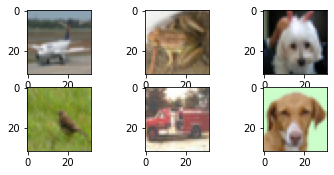

In [ ]:
# importing matplot lib
import matplotlib.pyplot as plt

# Plots 6 images, note subplot's arugments are nrows,ncols,index
# we set the color map to grey since our image dataset is grayscale
plt.subplot(331)
random_num = np.random.randint(0,len(x_train))
plt.imshow(x_train[random_num], cmap=plt.get_cmap('gray'))

plt.subplot(332)
random_num = np.random.randint(0,len(x_train))
plt.imshow(x_train[random_num], cmap=plt.get_cmap('gray'))

plt.subplot(333)
random_num = np.random.randint(0,len(x_train))
plt.imshow(x_train[random_num], cmap=plt.get_cmap('gray'))

plt.subplot(334)
random_num = np.random.randint(0,len(x_train))
plt.imshow(x_train[random_num], cmap=plt.get_cmap('gray'))

plt.subplot(335)
random_num = np.random.randint(0,len(x_train))
plt.imshow(x_train[random_num], cmap=plt.get_cmap('gray'))

plt.subplot(336)
random_num = np.random.randint(0,len(x_train))
plt.imshow(x_train[random_num], cmap=plt.get_cmap('gray'))

# Display out plots
plt.show()

In [ ]:
img_rows = x_train[0].shape[0]
img_cols = x_train[0].shape[1]

# Getting our date in the right 'shape' needed for Keras
# We need to add a 4th dimenion to our date thereby changing our
# Our original image shape of (60000,28,28) to (60000,28,28,1)
x_train = x_train.reshape(x_train.shape[0], img_rows, img_cols, 3)
x_test = x_test.reshape(x_test.shape[0], img_rows, img_cols, 3)

# store the shape of a single image 
input_shape = (img_rows, img_cols, 3)

# change our image type to float32 data type
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')

# Normalize our data by changing the range from (0 to 255) to (0 to 1)
x_train /= 255
x_test /= 255

print('x_train shape:', x_train.shape)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

x_train shape: (50000, 32, 32, 3)
50000 train samples
10000 test samples


In [ ]:
from keras.utils import np_utils

# Now we one hot encode outputs
y_train = np_utils.to_categorical(y_train)
y_test = np_utils.to_categorical(y_test)

# Let's count the number columns in our hot encoded matrix 
print ("Number of Classes: " + str(y_test.shape[1]))

num_classes = y_test.shape[1]
num_pixels = x_train.shape[1] * x_train.shape[2]

Number of Classes: 10


In [ ]:
y_train[0]

array([0., 0., 0., 0., 0., 0., 1., 0., 0., 0.], dtype=float32)

In [ ]:
import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras import backend as K
#from keras.optimizers import SGD 

# create model
model = Sequential()

model.add(Conv2D(32, kernel_size=(3, 3),
                 activation='relu',
                 input_shape=input_shape))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation='softmax'))

model.compile(loss = 'categorical_crossentropy',
              optimizer = "sgd",
              metrics = ['accuracy'])

print(model.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 30, 30, 32)        896       
                                                                 
 conv2d_1 (Conv2D)           (None, 28, 28, 64)        18496     
                                                                 
 max_pooling2d (MaxPooling2D  (None, 14, 14, 64)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 14, 14, 64)        0         
                                                                 
 flatten (Flatten)           (None, 12544)             0         
                                                                 
 dense (Dense)               (None, 128)               1605760   
                                                        

In [ ]:
batch_size = 32
epochs = 10

history = model.fit(x_train,
                    y_train,
                    batch_size = batch_size,
                    epochs = epochs,
                    verbose = 1,
                    validation_data = (x_test, y_test))

score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Epoch 1/10
1563/1563 [==============================] - 159s 102ms/step - loss: 2.0019 - accuracy: 0.2742 - val_loss: 1.7307 - val_accuracy: 0.3974
Epoch 2/10
1563/1563 [==============================] - 157s 100ms/step - loss: 1.7054 - accuracy: 0.3908 - val_loss: 1.5346 - val_accuracy: 0.4526
Epoch 3/10
1563/1563 [==============================] - 157s 100ms/step - loss: 1.5405 - accuracy: 0.4484 - val_loss: 1.3907 - val_accuracy: 0.5013
Epoch 4/10
1563/1563 [==============================] - 157s 101ms/step - loss: 1.4293 - accuracy: 0.4896 - val_loss: 1.3250 - val_accuracy: 0.5340
Epoch 5/10
1563/1563 [==============================] - 158s 101ms/step - loss: 1.3442 - accuracy: 0.5194 - val_loss: 1.2884 - val_accuracy: 0.5429
Epoch 6/10
1563/1563 [==============================] - 157s 101ms/step - loss: 1.2770 - accuracy: 0.5432 - val_loss: 1.2246 - val_accuracy: 0.5684
Epoch 7/10
1563/1563 [==============================] - 157s 100ms/step - loss: 1.2182 - accuracy: 0.5680 - val_